# 30 Day Map Challenge

Plan: Plot a retro issue! Counties consuming the most CFC's (which damage the Ozone Layer)

Setting up the notebook

In [1]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt

%matplotlib inline

Setting the working directory

In [2]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\2023 data\\Day 11")

Importing the countries shapefile [data](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/)

In [3]:
Countries = gpd.read_file("world-administrative-boundaries.shp")
Countries.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15..."
4,None,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,None,None,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."


Renaming Countries column to match the cfc consumption data

In [4]:
Countries = Countries.rename({'name': 'Country'}, axis = 'columns')

Extracting only the columns we need

In [5]:
pd.set_option('display.max_columns', None)

Countries = Countries[['Country','geometry']]
Countries

,Country,geometry
0,Uganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111..."
1,Uzbekistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,Ireland,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
3,Eritrea,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15..."
4,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."
...,...,...
251,Slovakia,"POLYGON ((22.55805 49.07944, 22.55166 49.03943..."
252,Mali,"POLYGON ((-4.80611 25.00027, -4.52528 24.82500..."
253,Armenia,"POLYGON ((46.54038 38.87559, 46.51639 38.87804..."
254,Albania,"POLYGON ((20.07142 42.56091, 20.10208 42.53347..."


Importing CFC [Data](https://www.nationmaster.com/country-info/stats/Environment/CFC/Consumption#)

In [7]:
cfc = pd.read_csv("Consumption.csv", encoding='latin1')
cfc.head()

,Country,Amount,Date
0,Algeria,"81,627.90",1997
1,Argentina,"31,916.40",1997
2,Australia,0.22,1997
3,Azerbaijan,"5,286.64",1997
4,Bangladesh,"5,643.89",1997


Joining the data together

In [9]:
cfcData = Countries.merge(cfc, #map_df merge to df
 left_on=['Country'], 
 right_on=['Country'])
cfcData

,Country,geometry,Amount,Date
0,Uganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...",6.05,1997
1,Uzbekistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205...",121.02,1997
2,Mongolia,"POLYGON ((116.71138 49.83047, 116.64665 49.738...",157.67,1997
3,Guinea-Bissau,"MULTIPOLYGON (((-16.08500 11.02597, -16.15472 ...",240.81,1997
4,Papua New Guinea,"MULTIPOLYGON (((153.77310 -11.61347, 153.67331...",288.08,1997
...,...,...,...,...
93,United Republic of Tanzania,"MULTIPOLYGON (((39.68249 -7.99333, 39.65305 -7...","1,125.00",1997
94,Chad,"POLYGON ((23.95111 15.70556, 23.86500 15.73055...",203.79,1997
95,Trinidad and Tobago,"MULTIPOLYGON (((-60.92306 10.79722, -60.94445 ...","19,060.20",1997
96,Slovakia,"POLYGON ((22.55805 49.07944, 22.55166 49.03943...",0.19,1997


Plotting the Map

(-197.9999889999999, 197.99998900000003, -62.85303549999992, 90.06468550000005)

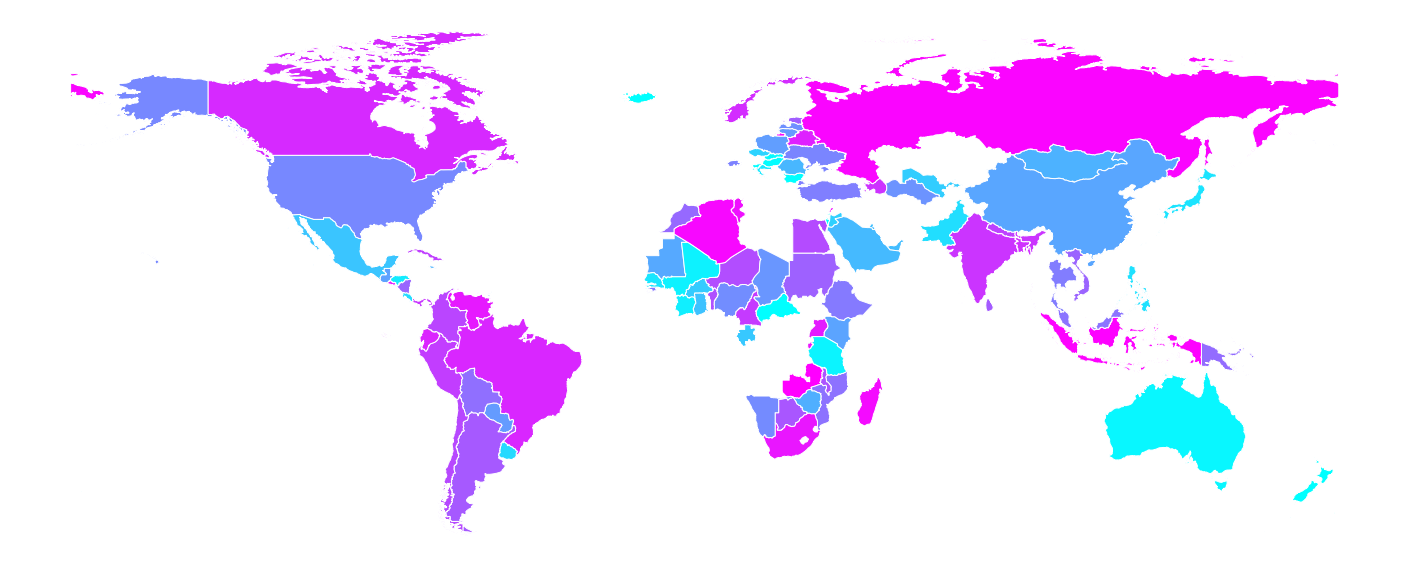

In [10]:
fig, ax = plt.subplots(1, figsize=(25,15))
cfcData.plot(column="Amount", 
              cmap="cool", 
              linewidth=1, 
              ax=ax,
            edgecolor='1', 
            legend = False)
ax.axis('off')